In [ ]:
import pandas as pd
!pip install python-chess
import chess.pgn
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for chess: filename=chess-1.11.1-py3-none-any.whl size=148497 sha256=15cef1e5592a4cbccb393a1ef797ee32c4c29d1d39f42629915d8f0d0459b554
  Stored in directory: /root/.cache/pip/wheels/f0/3f/76/8783033e8524d407e1bebaf72fdd3f3eba27e0c030e92bbd87
Successfully built chess


In [ ]:
# Load the PGN file containing the Lichess games
pgn_file = open('lichess_sseth333_games.pgn')

games = []

# Loop through each game in the PGN file
while True:
    # Read in the next game from the PGN file
    game = chess.pgn.read_game(pgn_file)
    if game is None:
        break

    # Extract the game data and append it to the list
    games.append({
        'Event': game.headers['Event'],
        'Site': game.headers['Site'],
        'Date': game.headers['Date'],
        'White': game.headers['White'],
        'Black': game.headers['Black'],
        'Result': game.headers['Result'],
        'UTCTime': game.headers['UTCTime'],
        'UTCDate': game.headers['UTCDate'],
        'WhiteElo': game.headers['WhiteElo'],
        'BlackElo': game.headers['BlackElo'],
        'Variant': game.headers['Variant'],
        'TimeControl': game.headers['TimeControl'],
        'ECO': game.headers['ECO'],
        'Termination': game.headers['Termination'],
        'Opening': game.headers['Opening'],
        'Moves': game.mainline_moves()
    })

# Convert the list of games to a pandas DataFrame
df = pd.DataFrame(games)
df = df[:1000]
df

,Event,Site,Date,White,Black,Result,UTCTime,UTCDate,WhiteElo,BlackElo,Variant,TimeControl,ECO,Termination,Opening,Moves
0,Rated Blitz game,https://lichess.org/qwx9tF5P,2023.05.04,PAASHUPATASTRA,sseth333,1-0,06:39:50,2023.05.04,2006,2018,Standard,180+0,A35,Normal,"English Opening: Symmetrical Variation, Four K...",1. c4 { [%clk 0:03:00] } 1... c5 { [%clk 0:03:...
1,Rated Blitz game,https://lichess.org/jUEFJj1s,2023.05.04,sseth333,alex_alex6,0-1,06:18:13,2023.05.04,2023,2049,Standard,180+0,A11,Normal,English Opening: Caro-Kann Defensive System,1. c4 { [%clk 0:03:00] } 1... c6 { [%clk 0:03:...
2,Rated Blitz game,https://lichess.org/0EsXLA1j,2023.05.04,Suzonic,sseth333,0-1,06:15:09,2023.05.04,2017,2018,Standard,180+0,B30,Normal,Sicilian Defense: Old Sicilian,1. e4 { [%clk 0:03:00] } 1... c5 { [%clk 0:03:...
3,Rated Blitz game,https://lichess.org/El5QxPjR,2023.05.04,sseth333,jonmikael,1-0,05:58:34,2023.05.04,2012,2011,Standard,180+0,A11,Time forfeit,English Opening: Caro-Kann Defensive System,1. c4 { [%clk 0:03:00] } 1... c6 { [%clk 0:03:...
4,Rated Blitz game,https://lichess.org/e7foeY6I,2023.05.04,Learner_of_Rosen,sseth333,0-1,05:49:43,2023.05.04,1968,2007,Standard,180+0,A43,Time forfeit,Benoni Defense: Old Benoni,1. d4 { [%clk 0:03:00] } 1... c5 { [%clk 0:03:...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Rated Bullet game,https://lichess.org/ucSIbV0i,2023.02.06,JuiceF23,sseth333,0-1,00:48:55,2023.02.06,1850,1801,Standard,60+0,A43,Time forfeit,Benoni Defense: Benoni Gambit Accepted,1. d4 { [%clk 0:01:00] } 1... c5 { [%clk 0:01:...
996,Rated Bullet game,https://lichess.org/JtshZhme,2023.02.06,sseth333,wgarlhubs,0-1,00:41:23,2023.02.06,1808,1756,Standard,60+0,A35,Time forfeit,"English Opening: Symmetrical Variation, Two Kn...",1. c4 { [%clk 0:01:00] } 1... c5 { [%clk 0:01:...
997,Rated Bullet game,https://lichess.org/E2XMeboj,2023.02.06,binaseduardo,sseth333,0-1,00:28:14,2023.02.06,1805,1802,Standard,60+0,A43,Normal,Benoni Defense: Old Benoni,1. d4 { [%clk 0:01:00] } 1... c5 { [%clk 0:01:...
998,Rated Bullet game,https://lichess.org/CrTbVbir,2023.02.06,gunam,sseth333,0-1,00:22:26,2023.02.06,1825,1796,Standard,60+0,B23,Time forfeit,"Sicilian Defense: Closed, Traditional",1. e4 { [%clk 0:01:00] } 1... c5 { [%clk 0:01:...


In [ ]:
import pandas as pd
import numpy as np
import chess
import chess.pgn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

def create_board_state(board):
    """Convert chess board to numerical representation."""
    state = np.zeros(64 * 12, dtype=np.int8)  # 12 piece types * 64 squares

    for square in chess.SQUARES:
        piece = board.piece_at(square)
        if piece is not None:
            # Get piece type (0-5 for white pieces, 6-11 for black pieces)
            piece_idx = piece.piece_type - 1
            if piece.color == chess.BLACK:
                piece_idx += 6
            # Set the corresponding position in the state array
            state[square + piece_idx * 64] = 1

    return state

def create_move_label(move, board):
    """Convert chess move to label."""
    # Calculate total possible moves (from_square * 64 + to_square)
    return move.from_square * 64 + move.to_square

def prepare_training_data(df):
    """Prepare training data from games DataFrame."""
    X = []  # Board states
    y = []  # Moves made

    for _, game in df.iterrows():
        board = chess.Board()
        try:
            # game['Moves'] is already a chess.pgn.Mainline object
            for move in game['Moves']:
                try:
                    # Store current board state
                    X.append(create_board_state(board))
                    # Store move made
                    y.append(create_move_label(move, board))
                    # Make the move on the board
                    board.push(move)
                except Exception as e:
                    print(f"Error processing move {move}: {e}")
                    continue
        except Exception as e:
            print(f"Error processing game: {e}")
            continue

    if not X:
        raise ValueError("No valid moves were processed. Check your move data format.")

    return np.array(X), np.array(y)

def create_model():
    """Create neural network model."""
    model = Sequential([
        Dense(4096, activation='relu', input_shape=(64 * 12,)),
        Dropout(0.3),
        Dense(2048, activation='relu'),
        Dropout(0.3),
        Dense(1024, activation='relu'),
        Dropout(0.3),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dense(64 * 64, activation='softmax')  # Output layer for all possible moves
    ])

    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

    return model

def predict_move(model, board):
    """Predict the next move given a board position."""
    # Convert board state to model input format
    board_state = create_board_state(board)
    board_state = np.expand_dims(board_state, axis=0)

    # Get model predictions
    move_probabilities = model.predict(board_state)[0]

    # Convert the highest probability move back to chess move
    best_move_idx = np.argmax(move_probabilities)
    from_square = best_move_idx // 64
    to_square = best_move_idx % 64

    # Create move object
    move = chess.Move(from_square, to_square)

    # Verify if move is legal
    legal_moves = list(board.legal_moves)
    if move in legal_moves:
        return move
    else:
        # If predicted move is illegal, choose random legal move
        return np.random.choice(legal_moves)

print("Starting training process...")

# Count total moves for progress tracking
total_moves = sum(1 for game in df['Moves'] for _ in game)
print(f"Total moves to process: {total_moves}")

# Prepare the training data
print("Preparing training data...")
X, y = prepare_training_data(df)
print(f"Total positions prepared: {len(X)}")

# Convert moves to one-hot encoded format
y = to_categorical(y, num_classes=64 * 64)

# Create the model
print("Creating model...")
model = create_model()

# Train the model
print("Training model...")
history = model.fit(X, y,
                   epochs=25,
                   batch_size=64,
                   validation_split=0.2,
                   verbose=1)

# Save the model
print("Saving model...")
model.save('my_chess_style.h5')

# Test the model on a new position
test_board = chess.Board()
predicted_move = predict_move(model, test_board)
print(f"\nTest prediction for starting position: {predicted_move}")

# Print training statistics
print("\nTraining Results:")
print(f"Final training accuracy: {history.history['accuracy'][-1]:.2%}")
print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.2%}")

Starting training process...
Total moves to process: 121187
Preparing training data...
Total positions prepared: 121187
Creating model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model...
Epoch 1/25
758/758 ━━━━━━━━━━━━━━━━━━━━ 592s 775ms/step - accuracy: 0.0358 - loss: 16.2136 - val_accuracy: 0.0350 - val_loss: 6.8972 - learning_rate: 0.0010
Epoch 2/25
758/758 ━━━━━━━━━━━━━━━━━━━━ 575s 759ms/step - accuracy: 0.0412 - loss: 6.8463 - val_accuracy: 0.0381 - val_loss: 6.6907 - learning_rate: 9.0000e-04
Epoch 3/25
758/758 ━━━━━━━━━━━━━━━━━━━━ 640s 783ms/step - accuracy: 0.0466 - loss: 6.6190 - val_accuracy: 0.0582 - val_loss: 6.4597 - learning_rate: 8.1000e-04
Epoch 4/25
758/758 ━━━━━━━━━━━━━━━━━━━━ 590s 740ms/step - accuracy: 0.0558 - loss: 6.4383 - val_accuracy: 0.0533 - val_loss: 6.4156 - learning_rate: 7.2900e-04
Epoch 5/25
758/758 ━━━━━━━━━━━━━━━━━━━━ 586s 774ms/step - accuracy: 0.0633 - loss: 6.3089 - val_accuracy: 0.0733 - val_loss: 6.2498 - learning_rate: 7.2900e-04
Epoch 6/25
758/758 ━━━━━━━━━━━━━━━━━━━━ 580s 766ms/step - accuracy: 0.0708 - loss: 6.2432 - val_accuracy: 0.0713 - val_loss: 6.1908 - learning_rate: 6.5610e-04
Epoch 7/25
758/758 ━━━━━━

In [ ]:
import pandas as pd
import numpy as np
import chess
import chess.pgn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

def create_board_state(board):
    """Convert chess board to numerical representation."""
    state = np.zeros(64 * 12, dtype=np.int8)  # 12 piece types * 64 squares

    for square in chess.SQUARES:
        piece = board.piece_at(square)
        if piece is not None:
            # Get piece type (0-5 for white pieces, 6-11 for black pieces)
            piece_idx = piece.piece_type - 1
            if piece.color == chess.BLACK:
                piece_idx += 6
            # Set the corresponding position in the state array
            state[square + piece_idx * 64] = 1

    return state

def create_move_label(move, board):
    """Convert chess move to label."""
    # Calculate total possible moves (from_square * 64 + to_square)
    return move.from_square * 64 + move.to_square

def prepare_training_data(df):
    """Prepare training data from games DataFrame."""
    X = []  # Board states
    y = []  # Moves made

    for _, game in df.iterrows():
        board = chess.Board()
        try:
            # game['Moves'] is already a chess.pgn.Mainline object
            for move in game['Moves']:
                try:
                    # Store current board state
                    X.append(create_board_state(board))
                    # Store move made
                    y.append(create_move_label(move, board))
                    # Make the move on the board
                    board.push(move)
                except Exception as e:
                    print(f"Error processing move {move}: {e}")
                    continue
        except Exception as e:
            print(f"Error processing game: {e}")
            continue

    if not X:
        raise ValueError("No valid moves were processed. Check your move data format.")

    return np.array(X), np.array(y)

def create_model():
    """Create neural network model."""
    model = Sequential([
        Dense(4096, activation='relu', input_shape=(64 * 12,)),
        BatchNormalization(),
        Dropout(0.25),  # Try lowering dropout a bit (e.g., from 0.3 to 0.25)

        Dense(2048, activation='relu'),
        BatchNormalization(),
        Dropout(0.25),

        Dense(1024, activation='relu'),
        BatchNormalization(),
        Dropout(0.25),

        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.25),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.25),

        Dense(64 * 64, activation='softmax')  # Output layer for 4096 moves
    ])

    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

    return model

def predict_move(model, board):
    """Predict the next move given a board position."""
    # Convert board state to model input format
    board_state = create_board_state(board)
    board_state = np.expand_dims(board_state, axis=0)

    # Get model predictions
    move_probabilities = model.predict(board_state)[0]

    # Convert the highest probability move back to chess move
    best_move_idx = np.argmax(move_probabilities)
    from_square = best_move_idx // 64
    to_square = best_move_idx % 64

    # Create move object
    move = chess.Move(from_square, to_square)

    # Verify if move is legal
    legal_moves = list(board.legal_moves)
    if move in legal_moves:
        return move
    else:
        # If predicted move is illegal, choose random legal move
        return np.random.choice(legal_moves)

print("Starting training process...")

# Count total moves for progress tracking
total_moves = sum(1 for game in df['Moves'] for _ in game)
print(f"Total moves to process: {total_moves}")

# Prepare the training data
print("Preparing training data...")
X, y = prepare_training_data(df)
print(f"Total positions prepared: {len(X)}")

# Convert moves to one-hot encoded format
y = to_categorical(y, num_classes=64 * 64)

# Create the model
print("Creating model...")
model = create_model()

# Train the model
print("Training model...")
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                 patience=3, verbose=1, min_lr=1e-6)
early_stopper = EarlyStopping(monitor='val_loss', patience=6, verbose=1, restore_best_weights=True)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the validation data explicitly.
history = model.fit(X_train, y_train,
                    epochs=25,
                    batch_size=64,
                    validation_data=(X_val, y_val),
                    callbacks=[lr_scheduler, early_stopper],
                    verbose=1)
# Save the model
print("Saving model...")
model.save('my_chess_style.h5')

# Test the model on a new position
test_board = chess.Board()
predicted_move = predict_move(model, test_board)
print(f"\nTest prediction for starting position: {predicted_move}")

# Print training statistics
print("\nTraining Results:")
print(f"Final training accuracy: {history.history['accuracy'][-1]:.2%}")
print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.2%}")

Starting training process...
Total moves to process: 81432
Preparing training data...
Total positions prepared: 81432
Creating model...
Training model...
Epoch 1/25
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 408s 390ms/step - accuracy: 0.0360 - loss: 6.7967 - val_accuracy: 0.0688 - val_loss: 5.9102 - learning_rate: 0.0010
Epoch 2/25
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 439s 387ms/step - accuracy: 0.0722 - loss: 5.7652 - val_accuracy: 0.0864 - val_loss: 5.6481 - learning_rate: 0.0010
Epoch 3/25
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 445s 390ms/step - accuracy: 0.1032 - loss: 5.3827 - val_accuracy: 0.1133 - val_loss: 5.4502 - learning_rate: 0.0010
Epoch 4/25
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 435s 383ms/step - accuracy: 0.1271 - loss: 5.0392 - val_accuracy: 0.1300 - val_loss: 5.3349 - learning_rate: 0.0010
Epoch 5/25
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 389s 382ms/step - accuracy: 0.1528 - loss: 4.7219 - val_accuracy: 0.1373 - val_loss: 5.3026 - learning_rate: 0.0010
Epoch 6/25
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 451s 391ms/ste

Saving model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step

Test prediction for starting position: c2c4

Training Results:
Final training accuracy: 39.03%
Final validation accuracy: 16.58%


In [ ]:
import pandas as pd
import numpy as np
import chess
import chess.pgn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def create_board_state(board):
    """Convert chess board to numerical representation."""
    state = np.zeros(64 * 12, dtype=np.int8)  # 12 piece types * 64 squares
    for square in chess.SQUARES:
        piece = board.piece_at(square)
        if piece is not None:
            piece_idx = piece.piece_type - 1
            if piece.color == chess.BLACK:
                piece_idx += 6
            state[square + piece_idx * 64] = 1
    return state

def create_move_label(move):
    """Convert chess move to label."""
    return move.from_square * 64 + move.to_square

def prepare_training_data(df):
    """Prepare training data from games DataFrame."""
    X = []
    y = []
    for _, game in df.iterrows():
        board = chess.Board()
        for move in game['Moves']:
            X.append(create_board_state(board))
            y.append(create_move_label(move))
            board.push(move)
    return np.array(X), np.array(y)

def create_model(input_dim, output_dim):
    """Create neural network model with L2 regularization."""
    model = Sequential([
        Dense(4096, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.25),
        Dense(2048, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.25),
        Dense(1024, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.25),
        Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.25),
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.25),
        Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Prepare the training data
X, y = prepare_training_data(df)
y = to_categorical(y, num_classes=64 * 64)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = create_model(input_dim=64 * 12, output_dim=64 * 64)

# Set up callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)
early_stopper = EarlyStopping(monitor='val_loss', patience=6, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    steps_per_epoch=len(X_train) // 64,
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=[lr_scheduler, early_stopper],
    verbose=1
)

# Save the model
model.save('my_chess_model.h5')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1003/1017 ━━━━━━━━━━━━━━━━━━━━ 7s 505ms/step - accuracy: 0.0311 - loss: 9.8024

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1017/1017 ━━━━━━━━━━━━━━━━━━━━ 556s 540ms/step - accuracy: 0.0311 - loss: 9.7766 - val_accuracy: 0.0497 - val_loss: 6.5339 - learning_rate: 0.0010
Epoch 2/50
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 538s 529ms/step - accuracy: 0.0450 - loss: 6.4877 - val_accuracy: 0.0362 - val_loss: 6.6215 - learning_rate: 0.0010
Epoch 3/50
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 535s 503ms/step - accuracy: 0.0471 - loss: 6.3933 - val_accuracy: 0.0399 - val_loss: 6.4522 - learning_rate: 0.0010
Epoch 4/50
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 576s 517ms/step - accuracy: 0.0532 - loss: 6.3280 - val_accuracy: 0.0298 - val_loss: 6.4379 - learning_rate: 0.0010
Epoch 5/50
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 570s 524ms/step - accuracy: 0.0574 - loss: 6.2553 - val_accuracy: 0.0560 - val_loss: 6.2956 - learning_rate: 0.0010
Epoch 6/50
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 551s 514ms/step - accuracy: 0.0634 - loss: 6.1967 - val_accuracy: 0.0760 - val_loss: 6.2512 - learning_rate: 0.0010
Epoch 7/50
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 526s 517ms/step - acc

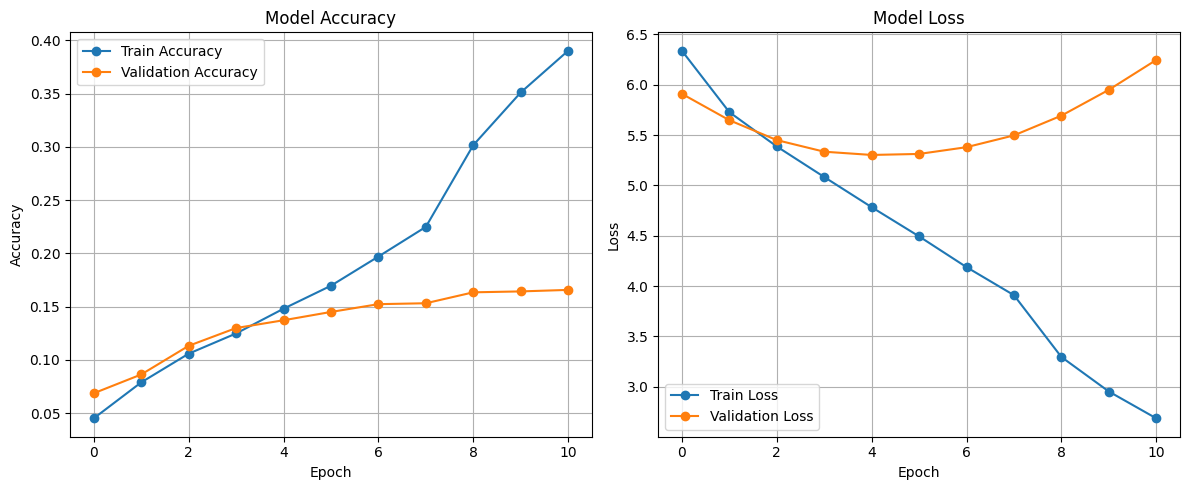

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='o', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], marker='o', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='o', label='Train Loss')
plt.plot(history.history['val_loss'], marker='o', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


509/509 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step


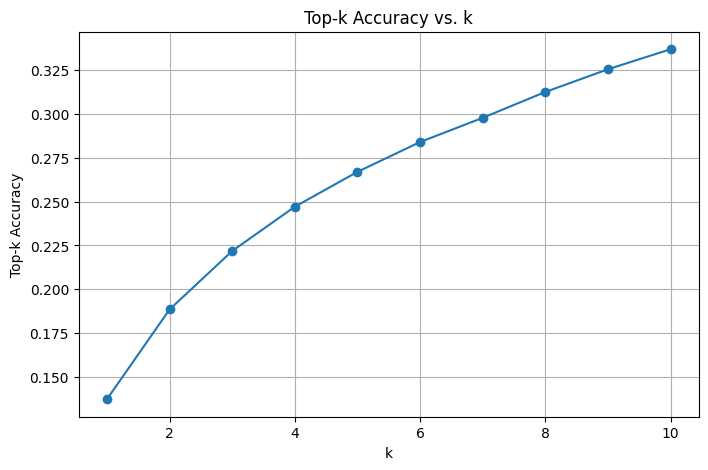

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def top_k_accuracy(y_true, y_pred_probs, k):
    # For each sample, get indices of the top k predictions
    top_k_preds = np.argsort(y_pred_probs, axis=1)[:, -k:]
    true_labels = np.argmax(y_true, axis=1)
    correct = 0
    for i, true_val in enumerate(true_labels):
        if true_val in top_k_preds[i]:
            correct += 1
    return correct / len(true_labels)

# Get predictions on the validation set (using your X_val and y_val from an earlier split)
y_val_pred_probs = model.predict(X_val)

ks = range(1, 11)
topk_accs = [top_k_accuracy(y_val, y_val_pred_probs, k) for k in ks]

plt.figure(figsize=(8, 5))
plt.plot(ks, topk_accs, marker='o')
plt.xlabel('k')
plt.ylabel('Top-k Accuracy')
plt.title('Top-k Accuracy vs. k')
plt.grid(True)
plt.show()


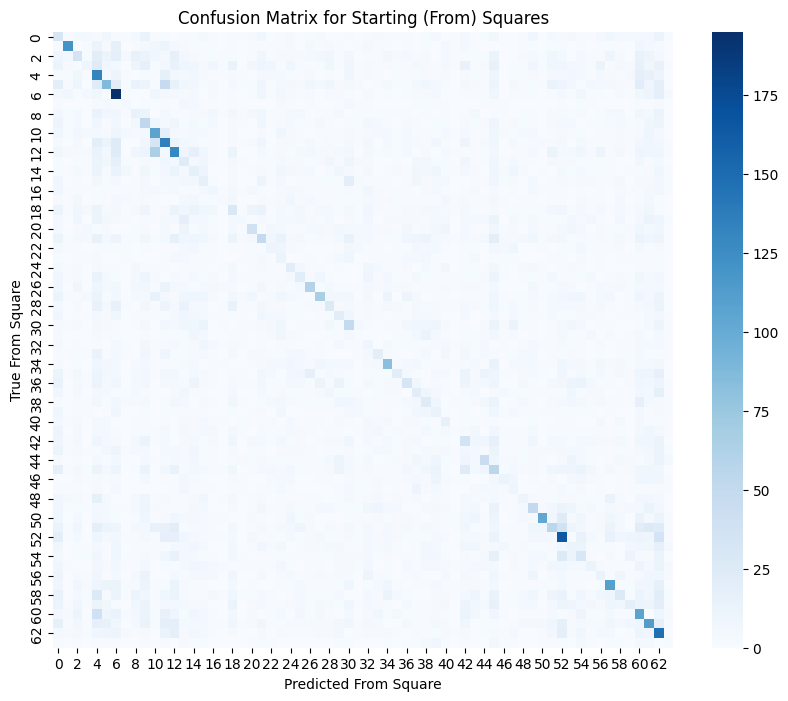

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Convert one-hot labels to class indices
y_val_true = np.argmax(y_val, axis=1)
y_val_pred = np.argmax(y_val_pred_probs, axis=1)

# Extract from-squares: integer division by 64
true_from = y_val_true // 64
pred_from = y_val_pred // 64

# Compute confusion matrix for from-squares
cm_from = confusion_matrix(true_from, pred_from, labels=range(64))

plt.figure(figsize=(10, 8))
sns.heatmap(cm_from, cmap='Blues', annot=False)
plt.title('Confusion Matrix for Starting (From) Squares')
plt.xlabel('Predicted From Square')
plt.ylabel('True From Square')
plt.show()


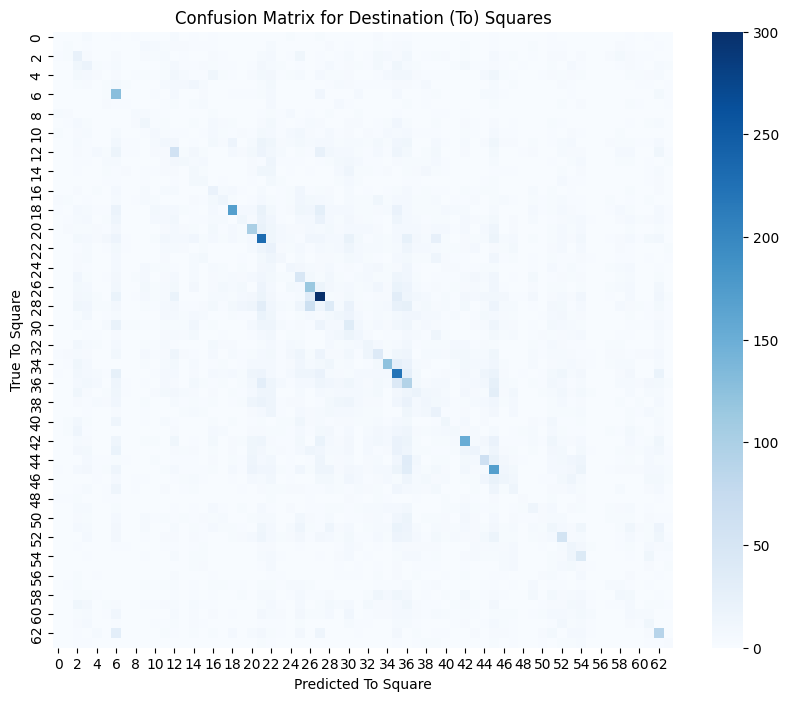

In [ ]:
true_to = y_val_true % 64
pred_to = y_val_pred % 64
cm_to = confusion_matrix(true_to, pred_to, labels=range(64))

plt.figure(figsize=(10, 8))
sns.heatmap(cm_to, cmap='Blues', annot=False)
plt.title('Confusion Matrix for Destination (To) Squares')
plt.xlabel('Predicted To Square')
plt.ylabel('True To Square')
plt.show()


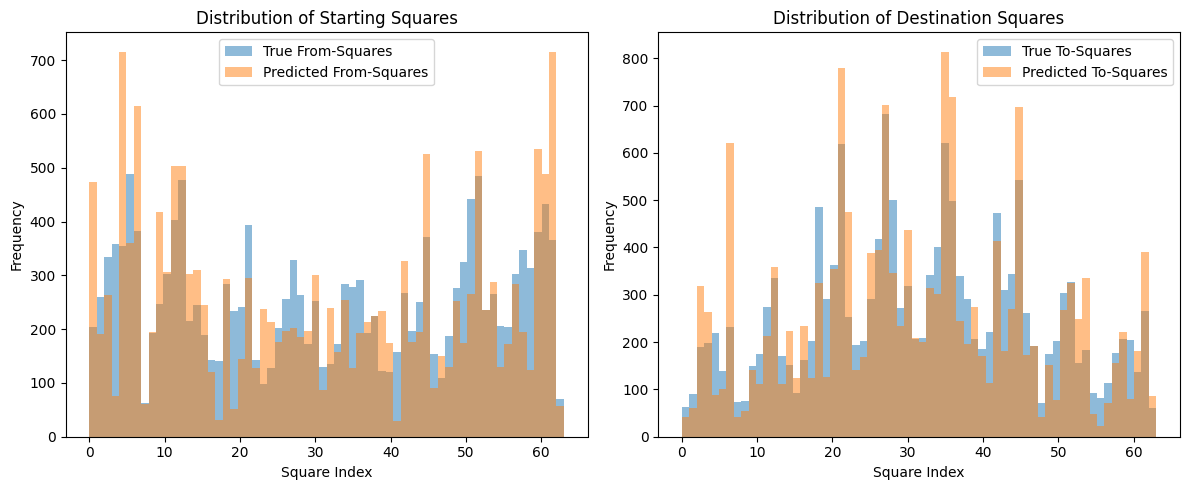

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(true_from, bins=64, alpha=0.5, label='True From-Squares')
plt.hist(pred_from, bins=64, alpha=0.5, label='Predicted From-Squares')
plt.xlabel('Square Index')
plt.ylabel('Frequency')
plt.title('Distribution of Starting Squares')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(true_to, bins=64, alpha=0.5, label='True To-Squares')
plt.hist(pred_to, bins=64, alpha=0.5, label='Predicted To-Squares')
plt.xlabel('Square Index')
plt.ylabel('Frequency')
plt.title('Distribution of Destination Squares')
plt.legend()

plt.tight_layout()
plt.show()


509/509 ━━━━━━━━━━━━━━━━━━━━ 24s 47ms/step


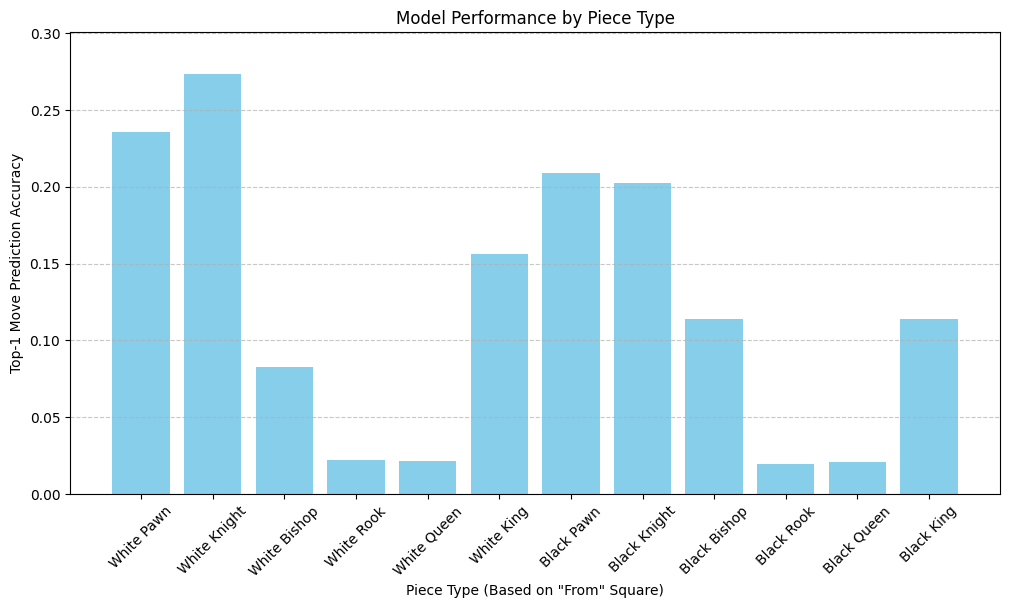

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Function to extract the piece channel (0-11) from the flattened board state,
# given the from_square index (0-63). The board state is structured so that for each
# channel, the index is: square_index + channel*64.
def get_piece_channel(board_state, from_square):
    # Loop over the 12 channels (0-11)
    for channel in range(12):
        if board_state[from_square + channel * 64] == 1:
            return channel
    return None  # Should not happen if the board state is valid

# Assume X_val and y_val come from your manual split of X and y.
# Get predictions on the validation set:
y_val_pred_probs = model.predict(X_val)

# Convert one-hot encoded labels to class indices.
y_val_true = np.argmax(y_val, axis=1)
y_val_pred = np.argmax(y_val_pred_probs, axis=1)

# Dictionaries to accumulate counts and correct predictions by piece channel.
piece_counts = defaultdict(int)
correct_counts = defaultdict(int)

# Loop over each validation example.
num_examples = X_val.shape[0]
for i in range(num_examples):
    true_move = y_val_true[i]
    pred_move = y_val_pred[i]

    # Compute the "from" square for true and predicted moves.
    true_from = true_move // 64  # integer division
    # (For performance-by-piece, we use the true board state to see what piece moved.)

    board_state = X_val[i]
    piece_channel = get_piece_channel(board_state, true_from)

    if piece_channel is not None:
        piece_counts[piece_channel] += 1
        # Count the move as "correct" if the predicted move exactly equals the true move.
        if true_move == pred_move:
            correct_counts[piece_channel] += 1

# Compute accuracy (fraction correct) by piece channel.
accuracy_by_piece = {}
for channel in piece_counts:
    accuracy_by_piece[channel] = correct_counts[channel] / piece_counts[channel]

# Map channel indices to human-friendly piece names.
piece_names = {
    0: 'White Pawn', 1: 'White Knight', 2: 'White Bishop',
    3: 'White Rook', 4: 'White Queen', 5: 'White King',
    6: 'Black Pawn', 7: 'Black Knight', 8: 'Black Bishop',
    9: 'Black Rook', 10: 'Black Queen', 11: 'Black King'
}

# Prepare data for plotting.
channels = sorted(accuracy_by_piece.keys())
accuracies = [accuracy_by_piece[ch] for ch in channels]
labels = [piece_names.get(ch, f'Channel {ch}') for ch in channels]

# Plot the bar chart.
plt.figure(figsize=(12, 6))
plt.bar(labels, accuracies, color='skyblue')
plt.xlabel('Piece Type (Based on "From" Square)')
plt.ylabel('Top-1 Move Prediction Accuracy')
plt.title('Model Performance by Piece Type')
plt.ylim(0, max(accuracies)*1.1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
